In [26]:
driver = webdriver.Chrome("chromedriver.exe")
driver.maximize_window()
a=input("유튜브명 : ")
url = "https://www.youtube.com/results?search_query={}".format(a)
driver.get(url)
driver.implicitly_wait(3)
time.sleep(1.5) 
driver.refresh()
element = driver.find_element(By.ID, "text") 
element.click()
element = driver.find_element(By.LINK_TEXT, "동영상")
element.click()
time.sleep(3) 
last_height = driver.execute_script("return document.documentElement.scrollHeight")
num_scrolls = 4  
url_list = [] 

for i in range(num_scrolls): 
    #처음부터 끝까지 스크롤을 내려 해당내용 크롤링
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight)")
    time.sleep(1.5)
    # 스크롤을 내렸을 때 더 이상 내용이 없을 때
    new_height = driver.execute_script("return document.documentElement.scrollHeight")
    
    if new_height == last_height: 
        break
    
    html_source = driver.page_source  
    soup = BeautifulSoup(html_source, "html.parser")

# 동영상의 url이 포함된 요소를 찾기 
parent_elements = soup.find_all(class_ = 'yt-simple-endpoint style-scope ytd-playlist-thumbnail')
# 동영상의 요소의 href값을 추출해 저장하기
for parent_element in parent_elements:
    url = parent_element['href']
    url_list.append('https://www.youtube.com' + url)

# 저장된 url 리스트를 프린트 하시오
url_list=list(set(url_list))
print(url_list)

#유료 가입 광고 무시하기
try:
    driver.find_element_by_css_selector("#dismiss-button > a").click()
except:
    pass

유튜브명 : 닥터프렌즈
['https://www.youtube.com/watch?v=-a-ieQIOWYQ', 'https://www.youtube.com/watch?v=aaH5fnh7OZQ', 'https://www.youtube.com/watch?v=ST-DHEcFTnM', 'https://www.youtube.com/watch?v=9tF29lNC_r4', 'https://www.youtube.com/watch?v=LmR_7pp7Sco', 'https://www.youtube.com/watch?v=Bcn1Bc7PUMM', 'https://www.youtube.com/watch?v=vzHlXCsuQy0', 'https://www.youtube.com/watch?v=ymWDRzQYl1I', 'https://www.youtube.com/watch?v=Y1lwMex__48', 'https://www.youtube.com/watch?v=Dyh5zDj-X6k', 'https://www.youtube.com/watch?v=BHahlVa8o8M', 'https://www.youtube.com/watch?v=Pr42rwOtsm0', 'https://www.youtube.com/watch?v=pXgaFjiNshk', 'https://www.youtube.com/watch?v=gfntZlAwdEo', 'https://www.youtube.com/watch?v=1TIlVPHUj18', 'https://www.youtube.com/watch?v=OE_t6CW5jq8', 'https://www.youtube.com/watch?v=41Io1aafS9Y', 'https://www.youtube.com/watch?v=ygZHeKH_Kyo', 'https://www.youtube.com/watch?v=rc0G8NiNzQg', 'https://www.youtube.com/watch?v=Ij7qHg-PUu4', 'https://www.youtube.com/watch?v=Ysd3X1mE0jk',

In [41]:
driver = webdriver.Chrome("chromedriver.exe")

urls=url_list[15:20]
id =[]
comment=[]

for url in urls:
    driver.get(url)
    driver.implicitly_wait(5)

    time.sleep(5)

    last_height = driver.execute_script("return document.documentElement.scrollHeight")
    while True:
        driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
        time.sleep(3)

        new_height = driver.execute_script("return document.documentElement.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height

    time.sleep(3)

    try:
        driver.find_element_by_css_selector("#dismiss-button > a").click()
    except:
            pass
        
    html_source = driver.page_source
    soup = BeautifulSoup(html_source, 'html.parser')

    id_list = soup.select("div#header-author > h3 > #author-text > span")
    comment_list = soup.select("yt-formatted-string#content-text")
    for i, j in zip(id_list,comment_list):
        id.append(i)
        comment.append(j)

In [42]:
id_final = []
comment_final = []

for i in range(len(id)):
    temp_id = id[i].text
    temp_id = temp_id.replace('\n', '')
    temp_id = temp_id.replace('\t', '')
    temp_id = temp_id.replace('    ', '')
    id_final.append(temp_id) # 댓글 작성자

    temp_comment = comment[i].text
    temp_comment = temp_comment.replace('\n', '')
    temp_comment = temp_comment.replace('\t', '')
    temp_comment = temp_comment.replace('    ', '')
    comment_final.append(temp_comment) # 댓글 내용

In [43]:
# 저장된 내용을 아이디, 댓글 내용를 가지도록 dict으로 저장
pd_data = {"아이디" : id_final, "댓글 내용" : comment_final}

# 데이터 프레임으로 변환
youtube_pd = pd.DataFrame(pd_data)

# 데이터를 xlsx로 저장 index=False 데이터의 순서 번호 제거
youtube_pd.to_excel("yo.xlsx", index=False)
df = pd.read_excel("yo.xlsx")
df.to_csv("yo.csv ", index=False, encoding="utf-8-sig")

In [44]:
df["아이디"]

0              시안Cyan
1              멍때리는루피
2              혜교화로운생
3                김아리옹
4               달콤한귤양
            ...      
1566      WOLF LONELY
1567             믹스초코
1568            MRC L
1569         gigsunny
1570               반반
Name: 아이디, Length: 1571, dtype: object

In [31]:
import matplotlib.font_manager as fm

for f in fm.fontManager.ttflist:
    if 'Nanum' in f.name:
        print(f.name, f.fname)

NanumGothic C:\Windows\Fonts\.TTF
NanumGothic C:\Windows\Fonts\BOLD.TTF
NanumGothic C:\Windows\Fonts\EXTRABOLD.TTF


In [45]:
# 폰트 경로 설정
font_path = 'C:/Users/anstj/AppData/Local/Microsoft/Windows/Fonts/NANUMSQUAREL.TTF'

In [46]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
stopwords.add("ㅋㅋ")
stopwords.add("ㅎㅎ")
stopwords.add("너무")
stopwords.add("진짜")
stopwords.add("와")

In [47]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [48]:
with open("stopwords.txt", encoding="utf-8") as f:
    stopwords = set(f.read().splitlines())

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# CSV 파일을 pandas 데이터프레임으로 읽어옴
#df = pd.read_csv('파일이름.csv',encoding='utf-8')

# 댓글 내용이 저장된 컬럼 선택
comment_col = '댓글 내용'
comment_list = df[comment_col].tolist()
new_list = []
for x in comment_list:
    new_list.append(str(x))

# 모든 댓글 내용을 하나의 문자열로 결합
text = ' '.join(new_list)

In [50]:
text

'학생 때 사물놀이 6년을 하면서 살짝 난청이 왔나봐요. 전화할 때 잘 못듣는 점, 마스크 때문에 입모양을 읽을 수 없어서 난감한 점, 안들리다보니 제 목소리도 작아지는 점, 그로 인해 자신감도 잃고 대화하는 걸 두려워하는 점까지.. 이번편은 너무 공감가는 부분이 많네요. 청력검사는 정상이고 난청으로 진단받은 건 아니지만 많은 분들이 저와 비슷한 어려움을 겪는다는 사실을 알게 되니까 두려움이 조금 나아지는 것 같아요. 항상 영상 잘 보고 있습니다. 혹시 연축성발성장애 에 대해서도 다뤄주실 수 있을까요? 3년 전 발병했고 이 병 때문에 여전히 힘든 일상을 보내고 있는데요. 워낙 이해받기 쉽지 않은 병이라 조금이라도 널리 알려졌으면 하는 마음에 부탁드려봅니다. 영상 잘 봤습니다! 이명과 난청 증상이 있어서 대학병원에 갔는데 메니에르 인 것 같다고 그러시더라구요.. 근데 어지러울 때 바로 응급실로 오라고 하셨는데 어지러웠다가 괜찮아졌다 가 반복 되어서 ..치료할 때 타이밍이 잘 맞아야 된다고 그러셨는데 타이밍을 못 잡겠어요.. ㅠㅠ 예전보다 사람들이랑 대화하면 다시 물어봐야 되는 것도 많아졌구요 고민입니다.. 평소에 귀가 밝은 편이라 남들이 못 듣는 바람소리나 이런 건 잘 듣는데 이상하게 사람이랑 대화하거나 통화할 때 말귀를 잘 못 알아듣겠어요.. 그래서 친구들이나 가족들이 일부러 못 알아듣는 척 하지 말라고 장난인거 다 안다고 그러는데 정말 집중을 해도 못알아듣겠어서 너무 속상해요ㅠㅠ 다들 말에 집중을 안 해서 그렇다 이러는데 코로나 때문에 마스크를 쓴 이후로 더 심해진 것 같더라구요. 저는 여태 모르고 있었는데 제가 대화를 할 때 사람 입을 보고 집중한다는 사실도 얼마 전에 깨달았어요... 주변에서 계속 짜증을 내니 저도 스트레스를 받는데 알아주는 사람은 아무도 없네요..ㅠㅠㅠ 며칠 전에 난청 검사를 했는데... 잘 들리면서 왜 안 들린다 그러냐고 그러더라고요...ㅠㅠ 저한테 집중해서 안 듣는거라고...ㅠㅠ 부스에서 삐뽀 검사는 조용하고 집중이 되니까 다 들렸어

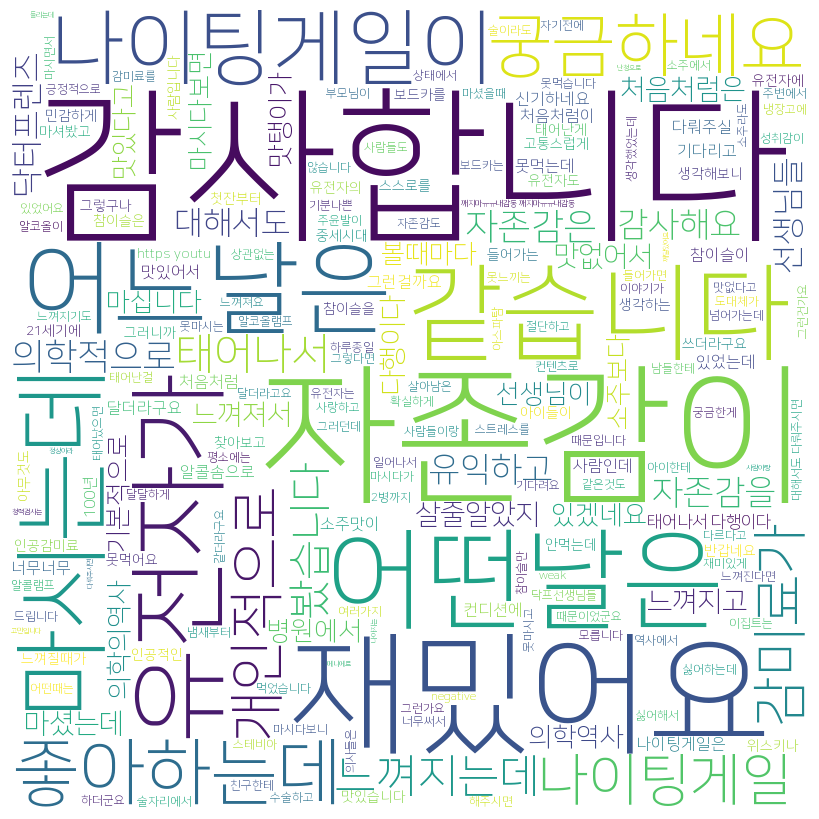

In [51]:
# 워드 클라우드 생성
wordcloud = WordCloud(font_path=font_path,width=800, height=800,
                      background_color='white',stopwords=stopwords, min_word_length=4).generate(text)

# 단어의 빈도 계산
wordcloud.generate_from_frequencies(wordcloud.process_text(text.lower()))
word_freq = wordcloud.process_text(text.lower())

# 워드 클라우드 출력
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

# 파일로 저장
plt.savefig('wordcloud.png')

In [52]:
##문제 정답

# 해당 숫자보다 낮은 빈도의 단어를 도출함
word_num = {}
for word, freq in word_freq.items():
    if freq < 3: # 해당 단어의 빈도수 보다 낮은 단어 도출
        word_num[word] = freq

# 낮은 빈도의 단어를 프린트함
for word, frequency in word_num.items():
    print(("{}: {}").format(word, frequency))

사물놀이: 1
왔나봐요: 1
입모양을: 1
안들리다보니: 1
작아지는: 1
자신감도: 1
두려워하는: 1
이번편은: 1
공감가는: 1
청력검사는: 2
정상이고: 1
난청으로: 2
진단받은: 1
겪는다는: 1
두려움이: 1
나아지는: 2
연축성발성장애: 1
발병했고: 1
이해받기: 1
알려졌으면: 1
부탁드려봅니다: 1
대학병원에: 1
메니에르: 2
그러시더라구요: 1
어지러울: 1
응급실로: 1
어지러웠다가: 1
괜찮아졌다: 1
타이밍이: 1
그러셨는데: 1
타이밍을: 1
잡겠어요: 1
예전보다: 1
대화하면: 1
물어봐야: 1
많아졌구요: 1
고민입니다: 2
바람소리나: 1
사람이랑: 2
대화하거나: 1
알아듣겠어요: 1
친구들이나: 1
가족들이: 1
알아듣는: 1
장난인거: 1
못알아듣겠어서: 1
속상해요ㅠㅠ: 1
이러는데: 1
마스크를: 1
집중한다는: 1
깨달았어요: 2
알아주는: 1
들리면서: 1
그러냐고: 1
그러더라고요: 1
듣는거라고: 1
부스에서: 1
조용하고: 1
들렸어요: 1
집중하면: 1
소리까지: 1
들리는데: 2
듣거든요: 1
어디가서: 1
얘기해야: 1
중요한게: 1
안듣는게: 1
안들려서: 1
못듣는거에요: 1
듣고싶은거만: 1
걸러듣는다고: 1
오해해요: 1
속상합니다: 1
갑작스레: 1
28살이: 1
안되었어요: 1
있어요ㅜㅜ: 1
명확하지: 1
원인불명인가요: 1
다뤄주시면: 2
감사하겠습니다: 1
청력검사에서는: 1
정상이라: 2
일상생활에서는: 1
우물우물: 1
들리거나: 1
외계어마냥: 1
물어보기엔: 1
상대방이: 2
보이더라고요: 1
마스크로: 1
보이니까: 1
됐고요ㅠ전화할: 1
상대방의: 1
비언어적: 1
입모양에: 1
의지하는: 1
편이더라고요: 1
습관인지는: 1
충격적으로: 1
다가왔어요: 1
뛰겠습니다ㅠㅠ: 1
43ㅜㅜ: 1
귀여우심: 1
31살돼서: 1
군대있을때: 1
사격소음이랑: 1
스트레스때문에: 1
생겼는데: 1
싶더라구요: 1
약먹는거도: 1
약먹는거지만: 1
피곤하면: 2
심해지구: 1
조심해요

In [53]:
for word, frequency in word_num.items():
    print(("{}").format(word))

사물놀이
왔나봐요
입모양을
안들리다보니
작아지는
자신감도
두려워하는
이번편은
공감가는
청력검사는
정상이고
난청으로
진단받은
겪는다는
두려움이
나아지는
연축성발성장애
발병했고
이해받기
알려졌으면
부탁드려봅니다
대학병원에
메니에르
그러시더라구요
어지러울
응급실로
어지러웠다가
괜찮아졌다
타이밍이
그러셨는데
타이밍을
잡겠어요
예전보다
대화하면
물어봐야
많아졌구요
고민입니다
바람소리나
사람이랑
대화하거나
알아듣겠어요
친구들이나
가족들이
알아듣는
장난인거
못알아듣겠어서
속상해요ㅠㅠ
이러는데
마스크를
집중한다는
깨달았어요
알아주는
들리면서
그러냐고
그러더라고요
듣는거라고
부스에서
조용하고
들렸어요
집중하면
소리까지
들리는데
듣거든요
어디가서
얘기해야
중요한게
안듣는게
안들려서
못듣는거에요
듣고싶은거만
걸러듣는다고
오해해요
속상합니다
갑작스레
28살이
안되었어요
있어요ㅜㅜ
명확하지
원인불명인가요
다뤄주시면
감사하겠습니다
청력검사에서는
정상이라
일상생활에서는
우물우물
들리거나
외계어마냥
물어보기엔
상대방이
보이더라고요
마스크로
보이니까
됐고요ㅠ전화할
상대방의
비언어적
입모양에
의지하는
편이더라고요
습관인지는
충격적으로
다가왔어요
뛰겠습니다ㅠㅠ
43ㅜㅜ
귀여우심
31살돼서
군대있을때
사격소음이랑
스트레스때문에
생겼는데
싶더라구요
약먹는거도
약먹는거지만
피곤하면
심해지구
조심해요
말해봐야
꾀병취급해요
지하3층에서
밖에서도
어디서든
이어폰을
복용해도
높으면서도
내용이네요
안다뤄주시네요
ㅠㅠ이어폰
망가지는
듣느라고
좋아요도
이어폰편
있을께요
상관관계가
있는지도
설명해주셨으면
듣기위해
과도하게
집중하면서
그로인해
피로도가
이런식으로요
추측입니다
돌발성난청에
영상찍어주세요
모르시더라구요
관련이군요
습관으로
문제점이나
위험성이
익숙해져서ㅜㅜ
편이거든요ㅠㅠㅠㅠ
것이라는
안오드라구요
가능한만큼
노력해서
고쳐야겠다는
듭니다ㅜㅜㅜㅜㅜㅜ
기다려지네요ㅠ
이관기능장애에
부주상골증후군
30년을
지내다가
우연찮게
엑스레이를
찍고나서
되었어요
제자리뛰기
ㅠㅠ혹시
부주상골증후군과
다뤄주셔서
얼마전에
다이어트

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np

In [56]:
def train_sentiment_analysis_model(positive_file, negative_file):
    # 긍정 단어와 부정 단어를 읽어서 리스트로 변환합니다.
    with open(positive_file, 'r', encoding='utf-8') as f:
        positive_words = f.read().splitlines()

    with open(negative_file, 'r', encoding='utf-8') as f:
        negative_words = f.read().splitlines()

    # 긍정적인 문장과 부정적인 문장을 학습 데이터로 생성합니다.
    positive_sentences = [" ".join(positive_words)] * len(positive_words)
    negative_sentences = [" ".join(negative_words)] * len(negative_words)

    # 학습 데이터와 레이블을 생성합니다.
    X = positive_sentences + negative_sentences
    y = [1] * len(positive_sentences) + [0] * len(negative_sentences)

    # CountVectorizer를 사용하여 단어의 빈도수를 측정합니다.
    vectorizer = CountVectorizer(token_pattern=r"\b\w+\b") 
    X = vectorizer.fit_transform(X)

    # LogisticRegression을 사용하여 모델을 학습합니다.
    clf = MultinomialNB()
    clf.fit(X, y)

    return vectorizer, clf

In [53]:
import itertools
import numpy as np

pos_list = []
neg_list = []
positive_list=[]
negative_list=[]
pos_convert=[]
neg_convert=[]

def train_sentiment_analysis_model(positive_file, negative_file):
    # 긍정 단어와 부정 단어를 읽어서 리스트로 변환합니다.
    with open(positive_file, 'r', encoding='utf-8') as f:
        positive_words = f.read().splitlines()

    with open(negative_file, 'r', encoding='utf-8') as f:
        negative_words = f.read().splitlines()

    max_permutations = 20

    pos_per = list(itertools.islice(itertools.permutations(positive_words), max_permutations))
    neg_per = list(itertools.islice(itertools.permutations(negative_words), max_permutations))

    for p in positive_sentences:
        pos_list.append(list(p))

    for i in range(0,len(pos_list)):
        a=[" ".join(pos_list[i])]
        positive_list.append(a)

    for num in positive_list:
        pos_convert.append(num[0])
    
    for n in negative_sentences:
        neg_list.append(list(n))

    for i in range(0,len(neg_list)):
        a=[" ".join(neg_list[i])]
        negative_list.append(a)

    for num in negative_list:
        neg_convert.append(num[0])

    # 학습 데이터와 레이블을 생성합니다.
    X = pos_convert + neg_convert
    y = [1] * len(pos_convert) + [0] * len(neg_convert)

    # CountVectorizer를 사용하여 단어의 빈도수를 측정합니다.
    vectorizer = CountVectorizer(token_pattern=r"\b\w+\b")
    X = vectorizer.fit_transform(X)
    # LogisticRegression을 사용하여 모델을 학습합니다.
    clf = MultinomialNB()
    clf.fit(X, y)

    return vectorizer, clf

In [57]:
def predict_sentiment_analysis(text, vectorizer, clf):
    # 입력된 텍스트를 벡터화합니다.
    X = vectorizer.transform([text])

    # 모델을 사용하여 감성을 예측합니다.
    y_pred = clf.predict(X)

    # 예측 결과에 따라 출력 메시지와 카운트 정보를 선택합니다.
    if y_pred[0] == 1:
        result = {"sentiment": "긍정적인 단어", "positive_count": 1, "negative_count": 0}
    else:
        result = {"sentiment": "부정적인 단어", "positive_count": 0, "negative_count": 1}

    # 입력된 텍스트에 포함된 긍정 단어와 부정 단어를 카운트합니다.
    for word in text.split():
        if word in positive_words:
            result["positive_count"] += 1
        elif word in negative_words:
            result["negative_count"] += 1

    return result

In [58]:
with open('positive_words.txt', 'r',encoding='utf-8') as f:
    positive_words = f.read().splitlines()

with open('negative_words.txt', 'r',encoding='utf-8') as f:
    negative_words = f.read().splitlines()

In [62]:
vectorizer, clf=train_sentiment_analysis_model("C:/Users/anstj/Downloads/ai/positive_words.txt","C:/Users/anstj/Downloads/ai/negative_words.txt")
text = input("분석할 문자열을 입력하세요: ")

predict_sentiment_analysis(text, vectorizer, clf)

분석할 문자열을 입력하세요: 학생 때 사물놀이 6년을 하면서 살짝 난청이 왔나봐요. 전화할 때 잘 못듣는 점, 마스크 때문에 입모양을 읽을 수 없어서 난감한 점, 안들리다보니 제 목소리도 작아지는 점, 그로 인해 자신감도 잃고 대화하는 걸 두려워하는 점까지.. 이번편은 너무 공감가는 부분이 많네요. 청력검사는 정상이고 난청으로 진단받은 건 아니지만 많은 분들이 저와 비슷한 어려움을 겪는다는 사실을 알게 되니까 두려움이 조금 나아지는 것 같아요. 항상 영상 잘 보고 있습니다. 혹시 연축성발성장애 에 대해서도 다뤄주실 수 있을까요? 3년 전 발병했고 이 병 때문에 여전히 힘든 일상을 보내고 있는데요. 워낙 이해받기 쉽지 않은 병이라 조금이라도 널리 알려졌으면 하는 마음에 부탁드려봅니다. 영상 잘 봤습니다! 이명과 난청 증상이 있어서 대학병원에 갔는데 메니에르 인 것 같다고 그러시더라구요.. 근데 어지러울 때 바로 응급실로 오라고 하셨는데 어지러웠다가 괜찮아졌다 가 반복 되어서 ..치료할 때 타이밍이 잘 맞아야 된다고 그러셨는데 타이밍을 못 잡겠어요.. ㅠㅠ 예전보다 사람들이랑 대화하면 다시 물어봐야 되는 것도 많아졌구요 고민입니다.. 평소에 귀가 밝은 편이라 남들이 못 듣는 바람소리나 이런 건 잘 듣는데 이상하게 사람이랑 대화하거나 통화할 때 말귀를 잘 못 알아듣겠어요.. 그래서 친구들이나 가족들이 일부러 못 알아듣는 척 하지 말라고 장난인거 다 안다고 그러는데 정말 집중을 해도 못알아듣겠어서 너무 속상해요ㅠㅠ 다들 말에 집중을 안 해서 그렇다 이러는데 코로나 때문에 마스크를 쓴 이후로 더 심해진 것 같더라구요. 저는 여태 모르고 있었는데 제가 대화를 할 때 사람 입을 보고 집중한다는 사실도 얼마 전에 깨달았어요... 주변에서 계속 짜증을 내니 저도 스트레스를 받는데 알아주는 사람은 아무도 없네요..ㅠㅠㅠ 며칠 전에 난청 검사를 했는데... 잘 들리면서 왜 안 들린다 그러냐고 그러더라고요...ㅠㅠ 저한테 집중해서 안 듣는거라고...ㅠㅠ 부스에서 삐뽀 검사는 조용하

{'sentiment': '긍정적인 단어', 'positive_count': 15, 'negative_count': 1}

In [63]:
df = pd.read_csv("yo.csv", encoding='utf-8-sig')
comment_col = '댓글 내용'
comment_list = df[comment_col].tolist()
new_list = []
for x in comment_list:
    new_list.append(str(x))

In [64]:
##문제 정답
emotion = []
for comment in new_list:
    prediction = predict_sentiment_analysis(comment, vectorizer, clf)
    emotion.append(prediction['sentiment'])

df["감정"]=pd.DataFrame(emotion)